In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch

def show_anns(anns, borders=True):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:, :, 3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.5]])
        img[m] = color_mask
        if borders:
            import cv2
            contours, _ = cv2.findContours(m.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            # Try to smooth contours
            contours = [cv2.approxPolyDP(contour, epsilon=0.01, closed=True) for contour in contours]
            cv2.drawContours(img, contours, -1, (0, 0, 1, 0.4), thickness=1)

    ax.imshow(img)

from sam2.build_sam import build_sam2
from sam2.automatic_mask_generator import SAM2AutomaticMaskGenerator

image = Image.open('./img/test.png')
image = np.array(image.convert("RGB"))

sam2_checkpoint = "./models/sam2/sam2_hiera_base_plus.pt"
model_cfg_0 = "configs/sam2/sam2_hiera_b+.yaml"

sam2 = build_sam2(model_cfg_0, sam2_checkpoint, device=torch.device("cuda"), apply_postprocessing=False)

mask_generator_0 = SAM2AutomaticMaskGenerator(
    model=sam2,
    use_m2m=False,
    )

In [15]:
masks_sam2 = mask_generator_0.generate(image)

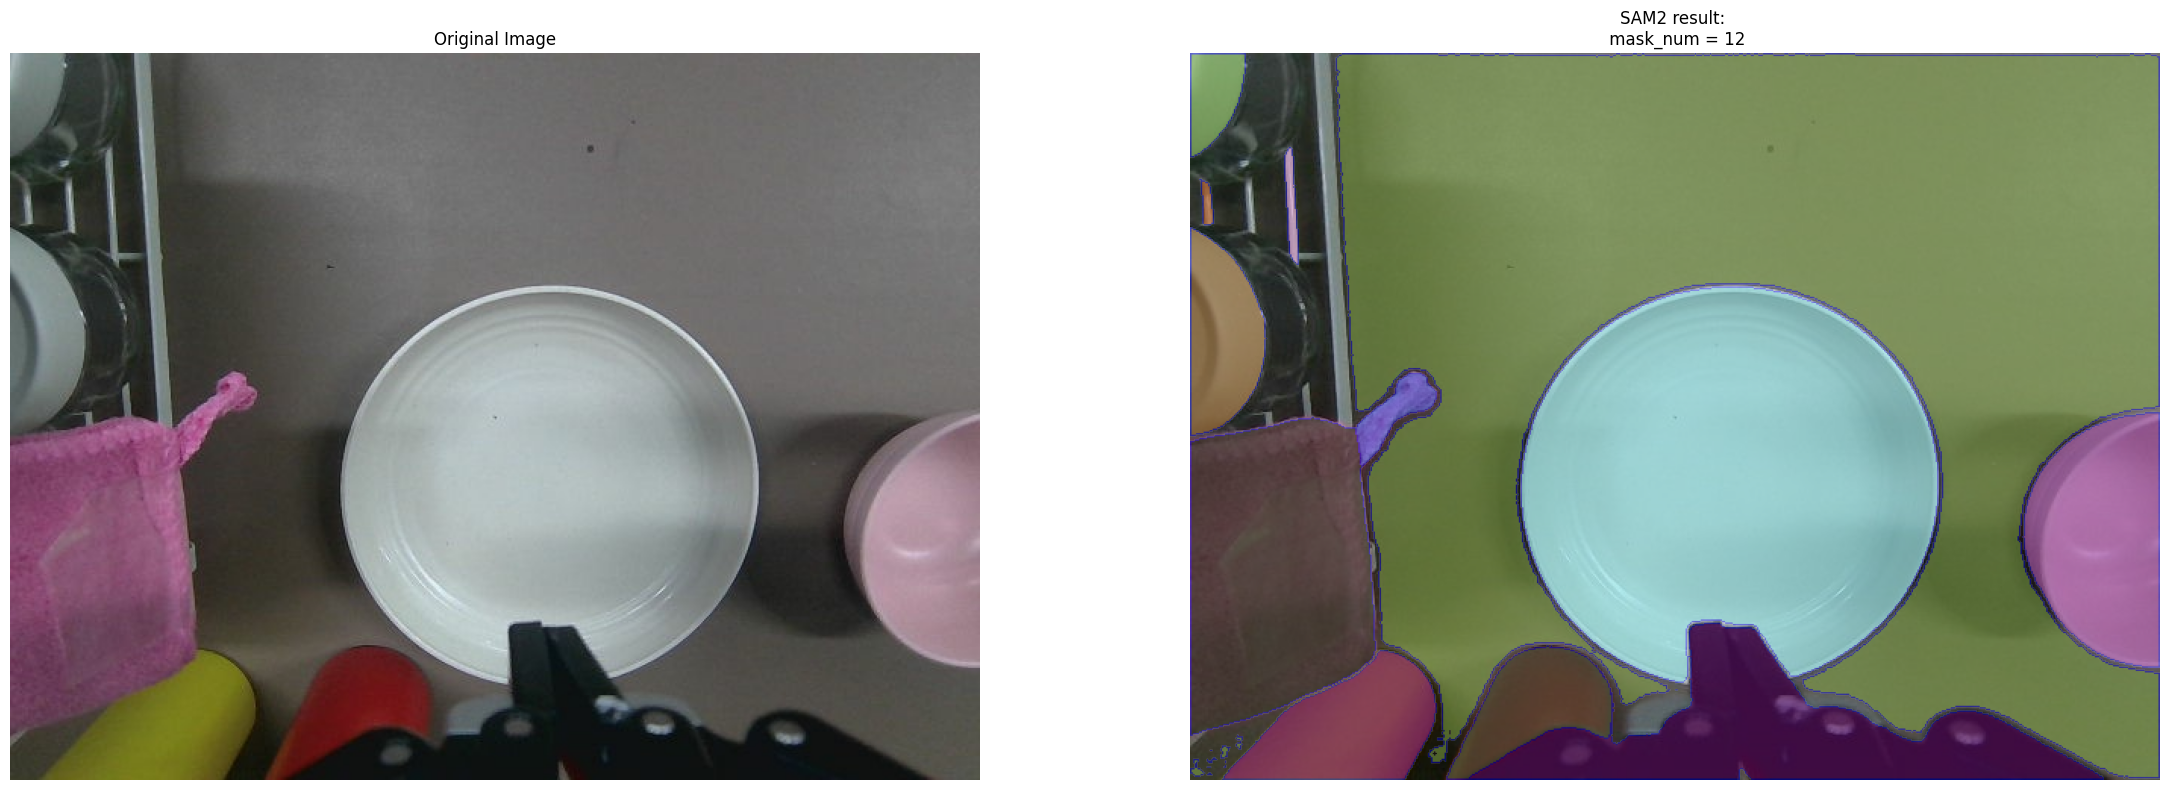

In [16]:
np.random.seed(3)
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# 原始图像
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# SAM2 结果
np.random.seed(3)
axes[1].imshow(image)
plt.sca(axes[1])
show_anns(masks_sam2, borders=True)
axes[1].set_title(f"SAM2 result: \n mask_num = {len(masks_sam2)}")
axes[1].axis('off')


plt.tight_layout()
plt.show()

In [17]:
masks_sam2


[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]], shape=(480, 640)),
  'area': 55367,
  'bbox': [218.0, 154.0, 275.0, 261.0],
  'predicted_iou': 0.9949299693107605,
  'point_coords': [[390.0, 397.5]],
  'stability_score': 0.990149199962616,
  'crop_box': [0.0, 0.0, 640.0, 480.0]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]], shape=(480